# Querying Scalar Quantities and Annually Averaged Timeseries

Models compute globally averaged quantities that are stored in `ocean_scalars.nc` files. This notebook shows how we do data discovery on scalar quantities and plot them as time series.

**Requirements:** `conda/analysis3-22.10` (or later).

In [1]:
%matplotlib inline

import pandas as pd
import intake
catalog = intake.cat.access_nri
import pandas as pd
import matplotlib.pyplot as plt
from dask.distributed import Client

It's often a good idea to start a cluster with multiple cores for you to work with. 

In [2]:
client = Client("tcp://10.6.62.1:8786")
client

<Client: 'tcp://10.6.62.1:8786' processes=1 threads=12, memory=46.00 GiB>

### Querying Scalar Quantities
Connect to the default database:

An **experiment** is a particular model run with a given forcing.  It is composed of several independent runs of the model.

Here is a list of experiments from the 0.25 degree ACCESS-OM2 physics only global configuration with JRA55-do v1.4 IAF Interannual Forcing, following the OMIP-2 protocol, and with at least 2000 NetCDF files.  

In [3]:
cat_subset = catalog.search(name='.*025deg_jra55_iaf_omip2_cycle.*')
sorted(set(cat_subset.df['name']))

['025deg_jra55_iaf_omip2_cycle1',
 '025deg_jra55_iaf_omip2_cycle2',
 '025deg_jra55_iaf_omip2_cycle3',
 '025deg_jra55_iaf_omip2_cycle4',
 '025deg_jra55_iaf_omip2_cycle5',
 '025deg_jra55_iaf_omip2_cycle6']

An experiment is composed of many different **variables** which are stored at different **frequencies**.

The function `cc.querying.get_frequencies` gives a list of the frequencies are available for a particular experiment.

In [4]:
cat_subset = cat_subset['025deg_jra55_iaf_omip2_cycle5']
print('\n'.join(f"frequency='{f}'" for f in set(cat_subset.df['frequency'])))

frequency='1day'
frequency='1mon'
frequency='fx'
frequency='1yr'


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/intake_esm/cat.py:270: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)


Here are all of the variables that are stored at the frequency of `1 monthly` and also are files of the form `ocean/ocean_scalar.nc`.

In [5]:
pd.set_option("display.max_rows", 200) # to ensure all rows of the pandas DataFrame are displayed
var_search = cat_subset.search(frequency='1mon', filename='ocean_scalar.nc')
one_file = var_search.df.iloc[0]
pd.DataFrame({var:one_file[var] for var in ['variable', 'variable_long_name', 'variable_standard_name', 'variable_units']})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/intake_esm/cat.py:270: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/intake_esm/cat.py:270: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)


,variable,variable_long_name,variable_standard_name,variable_units
0,total_mass_seawater,total mass of liquid seawater,sea_water_mass,kg
1,total_volume_seawater,total volume of liquid seawater,sea_water_volume,m^3
2,eta_adjust,global eta adjustment to include steric effect in Boussinesq fluid,,m
3,pbot_adjust,pbot adjustment to counteract spurious mass source in Boussinesq fluid,,dbar
4,rhoave,global mean ocean in-situ density from ocean_density_mod,,kg/m^3
5,eta_global,global ave eta_t plus patm_t/(g*rho0),,meter
6,temp_global_ave,Global mean temp in liquid seawater,sea_water_potential_temperature,deg_C
7,salt_global_ave,Global mean salt in liquid seawater,sea_water_salinity,psu
8,salt_surface_ave,Global mass weighted mean surface salt in liquid seawater,,psu
9,ke_tot,Globally integrated ocean kinetic energy,,10^15 Joules


Say, we want to look at one of these variables such as "total_ocean_salt".  We use `cc.querying.getvar()` for this.

In [6]:
experiment = "025deg_jra55_iaf_omip2_cycle5"
variable = "total_ocean_salt"
cat_subset = catalog[experiment]
var_search = cat_subset.search(variable=variable, frequency='1mon')
darray = var_search.to_dask()
darray = darray[variable]
da = darray
da

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/intake_esm/cat.py:270: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/intake_esm/cat.py:270: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/intake_esm/cat.py:270: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)


<xarray.DataArray 'total_ocean_salt' (time: 732, scalar_axis: 1)>
dask.array<concatenate, shape=(732, 1), dtype=float32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * scalar_axis  (scalar_axis) float64 0.0
  * time         (time) datetime64[ns] 1958-01-14T12:00:00 ... 2018-12-14T12:...
Attributes:
    long_name:      total mass of salt in liquid seawater
    units:          kg/1e18
    valid_range:    [-1.e+02  1.e+10]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

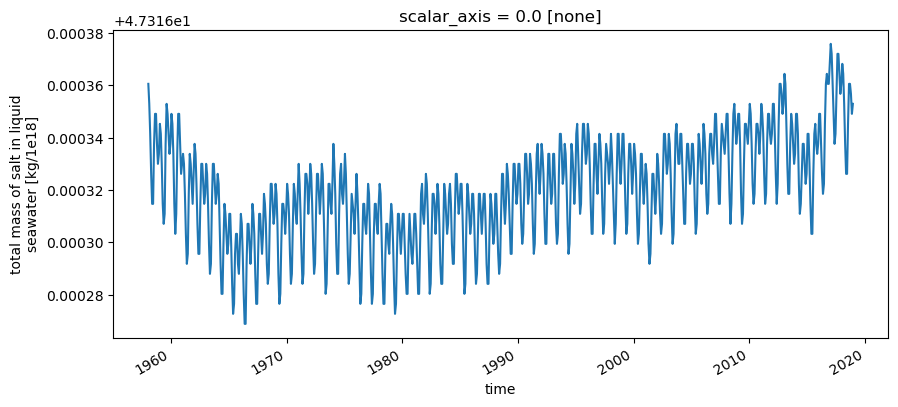

In [7]:
da.plot(figsize=(10,4))

Suppose we want to compare this variable across several different experiments. Using our list of experiments from above, we call put that into a Python list.

Here we select the six 61-year cycles of 1 Jan 1958 to 1 Jan 2019 from the list of experiments above. These cycles are sequential, with each cycle starting where the previous one ended, with the initialization date reset to 1959. Here we show how to plot some quantities to compare those cycles.

In [8]:
experiments = sorted(set(catalog.search(name='025deg_jra55_iaf_omip2_cycle.*').df['name']))
experiments

['025deg_jra55_iaf_omip2_cycle1',
 '025deg_jra55_iaf_omip2_cycle2',
 '025deg_jra55_iaf_omip2_cycle3',
 '025deg_jra55_iaf_omip2_cycle4',
 '025deg_jra55_iaf_omip2_cycle5',
 '025deg_jra55_iaf_omip2_cycle6']

And for each experiment, extract out the variable of interest and store the result in a dictionary using the experiment as the key. Notice we are computing the variables and storing the results for later visualization.

Here we add an exception for experiments that do not have total_ocean_salt as an output

In [9]:
results = {}
variable = "total_ocean_salt"
for experiment in experiments:
  try:
    cat_subset = catalog[experiment]
    var_search = cat_subset.search(variable=variable, frequency='1mon')
    darray = var_search.to_dask()
    darray = darray[variable]
    results[experiment] = darray
  except KeyError:
    print(f"No {variable} in {experiment}")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/intake_esm/cat.py:270: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/intake_esm/cat.py:270: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/intake_esm/cat.py:270: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/intake_esm/cat.py:270: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(type)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/intake_esm/cat.py:270: FutureWarning: DataFrame.applymap has been deprecated. Use D

Now, plot the results

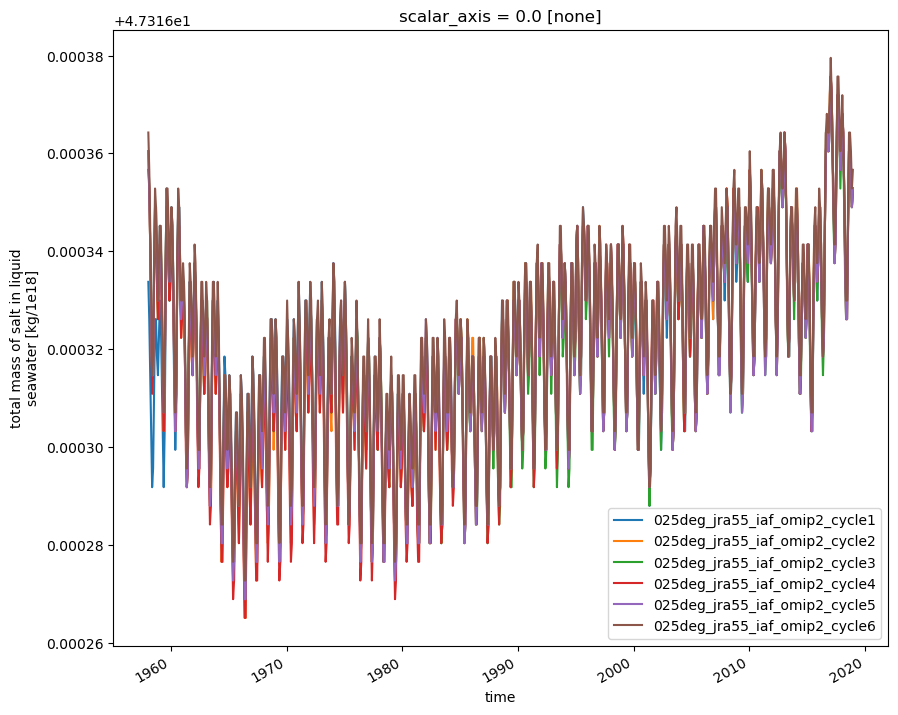

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for experiment, result in results.items():
    result.plot(label=experiment, ax=ax)
ax.legend()

### Annually Averaged Scalar Timeseries
This section presents how the data are resampled onto annual averages.

Note that the previous timeseries are monthly so we need to use groupby and a time mean to resample the data onto annual frequency.

In [11]:
results_annual_average = dict()
for experiment, result in results.items():
    results_annual_average[experiment] = results[experiment].groupby('time.year').mean(dim='time')

**Then,** the data can be plotted as you see fit:

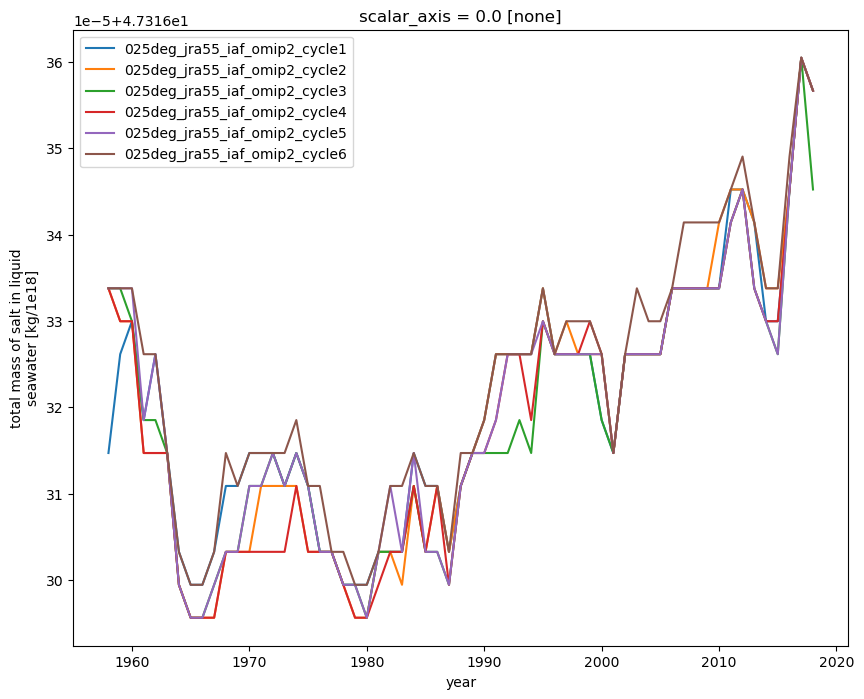

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for experiment, result_annual_average in results_annual_average.items():
    result_annual_average.plot(label = experiment)
ax.legend()